In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.drop("id", axis=1, inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


# Data Cleaning 



1) Are there any missing values or duplicate in a dataset? <br>
2) Lets Remove Outliers<br>
    
    a) Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.
    
    b) ap_lo and ap_hi features:::ap_hi outlier values over 250 and ap_lo outlier values over 200, without fear of missing data. 
    
    
3) Convert Age (in days) to Age (years)
    

##### 1) Are there any missing values or duplicate in a dataset?

In [3]:
print("There is {} duplicated values and {} missing values in data".format(
    df.duplicated().sum(),
    df.isnull().sum().sum())
     )

There is 24 duplicated values and 0 missing values in data


Lets get rid of those 24 duplicate values, <br>but lets check it out before we remove it

In [4]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
duplicated.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1


In [5]:
df.drop_duplicates(inplace=True)
print("There is {} duplicated values in data".format(df.duplicated().sum()))

There is 0 duplicated values in data


##### 2.a) Let's remove weights and heights

If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

In [6]:
height_outlier = (df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))
weight_outlier = (df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))

df.drop(df[height_outlier].index,inplace=True)
df.drop(df[weight_outlier].index,inplace=True)

len(df)

/home/deep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


64328

##### 2.b) ap_lo and ap_hi features


Lets us check out the boundary values of Systolic (ap_hi) and Diastolic (ap_lo) so we can check for extreme values

In [7]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) 
for each in ap_list:
    Q1 = df[each].quantile(0.25)
    Q3 = df[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


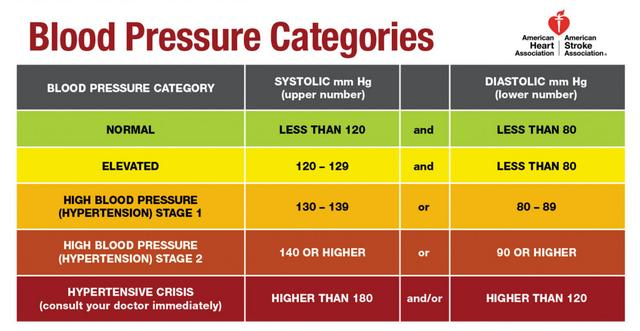

* A study published by doctors in NCBI NLM recorded a maximum blood pressure of 370/360 mm Hg. This study was performed by recording blood pressure in 10 male athletes through radial artery catheterization.
* Thus we can drop the ap_hi outlier values over 250 and ap_lo outlier values over 200, without fear of missing data.

In [8]:
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200) )
print("There is {} outlier".format(df[out_filter]["cardio"].count()))

There is 873 outlier


In [9]:
df = df[~out_filter]

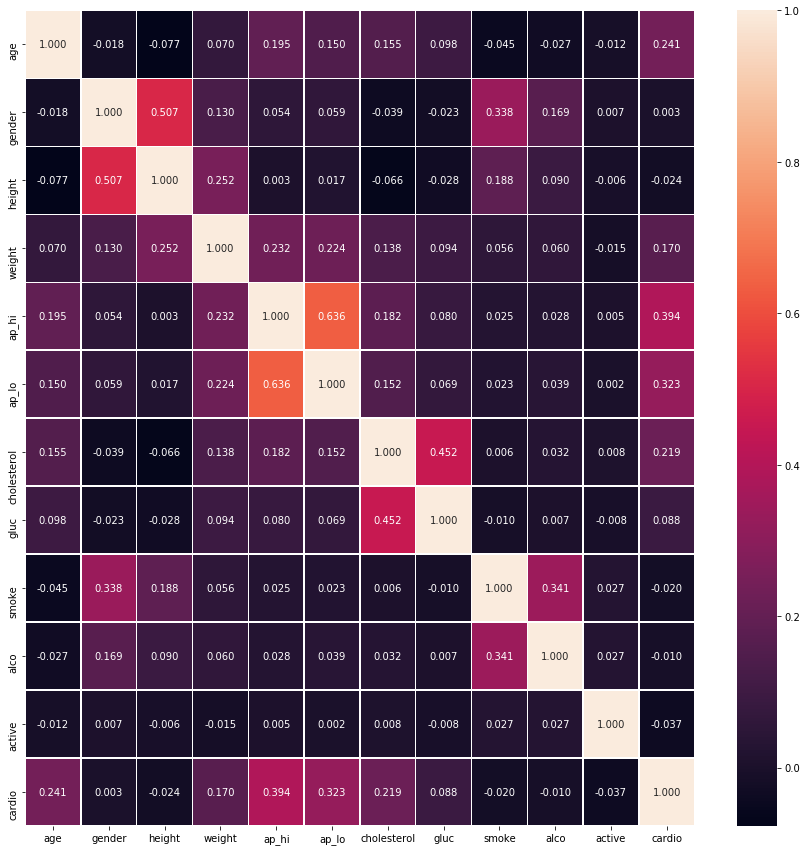

In [10]:
corr = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

* We can see from correlation map easily; cholesterol, blood pressure (ap_hi and ap_low both) and age have a powerful relationship with cardiovascular diseases.
* Glucogen and cholesterol have a strong relationship among them either.

##### 3) Convert Age (in days) to Age (years)

In [11]:
df.age = df.age.apply(lambda x: x // 365)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


## Feature Engg.

1) Body Mass Index Feature

Height and weight seems uncorrelated with the cardio feature but Body Mass Index could be helpful to train our model.

2) Detecting Gender of patients


##### 1) BMI Feature

In [12]:
df_without_BMI = df.copy()

In [13]:
df["BMI"] = round(df.weight / ((df.height/100)*2),2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,18.45
1,55,1,156,85.0,140,90,3,1,0,0,1,1,27.24
2,51,1,165,64.0,130,70,3,1,0,0,0,1,19.39
3,48,2,169,82.0,150,100,1,1,0,0,1,1,24.26
4,47,1,156,56.0,100,60,1,1,0,0,0,0,17.95


##### 2) Detecting Gender

In [14]:
a = df[df["gender"]==1]["height"].mean()
b = df[df["gender"]==2]["height"].mean()
if a > b:
    gender = "male"
    gender2 = "female"
else:
    gender = "female"
    gender2 = "male"
print("Gender:1 is {} & Gender:2 is {}".format(gender,gender2))

Gender:1 is female & Gender:2 is male


* Women have many of the same risk factors with men for heart disease as men, such as smoking, high blood pressure, and high cholesterol especially after 65.
* Thus we shouldn't categorize them into 1 and 2 because of 2 is always numerically bigger than 1, the model would take into account that and give a bigger ratio to men for having a disease
* We did not change other categorical code to one hot encoding because they express really hierarchical size
* An example from describtion of dataset : Cholesterol | 1: normal, 2: above normal, 3: well above normal

In [15]:
df["gender"] = df["gender"] % 2

In [16]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

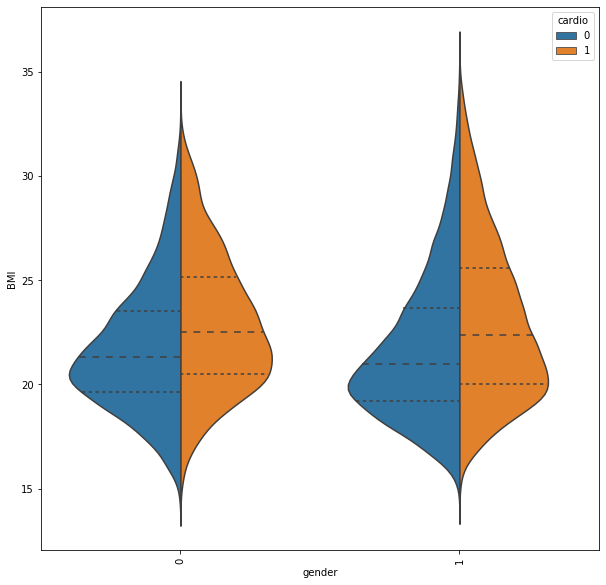

In [17]:
from sklearn.preprocessing import StandardScaler
df_std = standartization(df)

data = pd.melt(df_std,id_vars="cardio",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="gender", y="BMI", hue="cardio", data=df_std,split=True, inner="quart")
plt.xticks(rotation=90)

In [18]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,0,168,62.0,110,80,1,1,0,0,1,0,18.45
1,55,1,156,85.0,140,90,3,1,0,0,1,1,27.24
2,51,1,165,64.0,130,70,3,1,0,0,0,1,19.39
3,48,0,169,82.0,150,100,1,1,0,0,1,1,24.26
4,47,1,156,56.0,100,60,1,1,0,0,0,0,17.95


In [19]:
x = df.to_csv(index=False)
with open("new_cvd_data.csv", "w") as f:
    f.write(x)